In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [65]:
movies = pd.read_csv('./Data/opening.csv')
movies.shape

(2272, 4)

In [66]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272 entries, 0 to 2271
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2272 non-null   int64  
 1   movie_title    2272 non-null   object 
 2   opening_gross  2247 non-null   float64
 3   screens        2190 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 71.1+ KB


<AxesSubplot:>

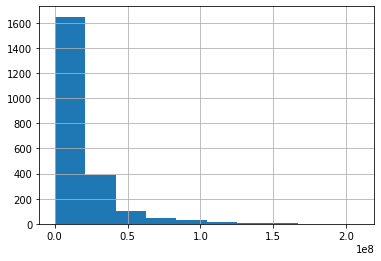

In [67]:
movies['opening_gross'].hist()

<AxesSubplot:>

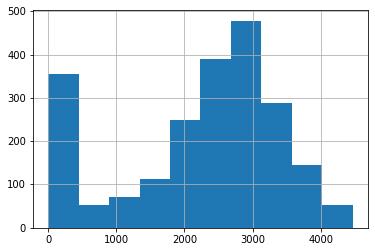

In [68]:
movies['screens'].hist()

In [69]:
movies.duplicated(['movie_title'], keep=False).value_counts()

False    2272
dtype: int64

In [70]:
movies.notnull().apply(pd.Series.value_counts)

,Unnamed: 0,movie_title,opening_gross,screens
False,NaN,NaN,25,82
True,2272.0,2272.0,2247,2190


In [41]:
available = ((movies != 0) & (movies.notnull()))
available.all(axis = 1).value_counts()

True     2189
False      83
dtype: int64

In [42]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')

In [79]:
movies_2 = movies[['opening_gross', 'screens']]
movies_2

,opening_gross,screens
0,2451.0,10.0
1,8330681.0,2271.0
2,19883351.0,2704.0
3,5329240.0,2331.0
4,923715.0,19.0
...,...,...
2267,24733155.0,3036.0
2268,20065617.0,3482.0
2269,15650000.0,3394.0
2270,4510408.0,NaN


In [80]:
values = imputer.fit_transform(movies_2)
values.shape

(2272, 2)

In [85]:
x = pd.DataFrame(values)
x.columns = movies_2.columns
x.index = movies_2.index
x

,opening_gross,screens
0,2451.0,10.000000
1,8330681.0,2271.000000
2,19883351.0,2704.000000
3,5329240.0,2331.000000
4,923715.0,19.000000
...,...,...
2267,24733155.0,3036.000000
2268,20065617.0,3482.000000
2269,15650000.0,3394.000000
2270,4510408.0,2239.673973


In [95]:
new_movies = pd.concat([movies['movie_title'],x], axis = 1)
new_movies

,movie_title,opening_gross,screens
0,10 Days in a Madhouse,2451.0,10.000000
1,10 Things I Hate About You,8330681.0,2271.000000
2,102 Dalmatians,19883351.0,2704.000000
3,12 Rounds,5329240.0,2331.000000
4,12 Years a Slave,923715.0,19.000000
...,...,...,...
2267,Zombieland,24733155.0,3036.000000
2268,Zookeeper,20065617.0,3482.000000
2269,Zoolander 2,15650000.0,3394.000000
2270,Zoom,4510408.0,2239.673973
